# Autoencoders in Python

**Jessica Cervi**

## Activity Overview 

An autoencoder is an unsupervised machine learning algorithm that, for example, takes an image as input and tries to reconstruct it using a compressed latent representation (e.g., a latent representation requiring a fewer number of values than in the original image).

In this notebook, we'll use the famous MNIST dataset for images of written numerical digits. We will first experiment with the implementation of an autoencoder with just one hidden layer. Finally, we will compare this with the results produced by an autoencoder with multiple layers.

This activity is designed to help you apply the machine learning algorithms you have learned using the packages in `Python`. `Python` concepts, instructions, and starter code are embedded within this Jupyter Notebook to help guide you as you progress through the activity. Remember to run the code of each code cell prior to submitting the assignment. Upon completing the activity, we encourage you to compare your work against the solution file to perform a self-assessment.

## Index:

#### Week 3:  Autoencoders

- [Part 1](#part1) - Autoencoders
- [Part 2](#part2) - Setting up the Problem
- [Part 3](#part3) - Single-Layer Autoencoder
- [Part 4](#part4) - Multi-Layer Autoencoder

[Back to top](#Index:) 

<a id='part1'></a>

# Autoencoders <a></a>

We can consider autoencoders as an unsupervised learning technique, because you don’t need explicit labels to train the model on. All you need to train an autoencoder is raw input data.

As you've read in the introduction, an autoencoder is an unsupervised machine learning algorithm that takes an input and tries to reconstruct it using a fewer number of bits from the bottleneck, also known as the latent space. The image is maximally compressed at the bottleneck. The compression in autoencoders is achieved by training the network for a period of time - as it learns, it tries to best represent the input image at the bottleneck. 

Autoencoders work by using a dimensionality reduction technique. They project the data from a higher dimension to a lower dimension using a linear transformation and try to preserve the important features of the data while removing the non-essential parts.

Now that you have a bit of understanding about autoencoders, let's have a closer look at their structure.

<img src="images/encoder.png" alt="Drawing" style="width: 400px;"/>

The figure above represents a two-layer simplified autoencoder with one hidden layer. In deep learning terminology, you'll often notice that the input layer is never taken into account while counting the total number of layers in an architecture. In general, the total number of layers in an architecture only comprises the number of hidden layers and the ouput layer.

As shown in the image above, the input and output layers have the same number of neurons.

Let's take an example. You feed an image with just five pixel values into the autoencoder. The encoder then compresses the image into three values (vector $z$) at the bottleneck (middle layer) or latent space. Using these three values, the decoder tries to reconstruct (output) five pixel values that are as close as possible to the values in the original image which you fed as an input to the network.

Of course, in typical practice, there are often a larger number of hidden layers in between the input and the output.

<img src="images/multiple.png" alt="Drawing" style="width: 600px;"/>

### Encoder vs. Decoder

The autoencoder has three parts:

- The **Encoder** compresses or downsamples the input into a fewer number of values. The space represented by these smaller number of values is often called the latent space or bottleneck. 

- **The bottleneck** is also called the "maximum point of compression" since, at this point, the input is compressed the most. These compressed values that represent the original input are together called as “encoding” of the input.

- The **Decoder** tries to reconstruct the input using only the encoding of the input. When the decoder is able to reconstruct the input exactly as it was fed to the encoder, the encoder can then produce the best encodings for the input with which the decoder is able to reconstruct well!

## Convolutional Autoencoders in Python with Keras

Since we're going to work with images,  it's a good idea to use a convolutional autoencoder. This is a traditional autoencoder where each layer is a convolutional layer: we basically replace fully connected layers with convolutional layers. 

[Back to top](#Index:) 

<a id='part2'></a>

## Setting up the Problem <a></a>

The classic [`MNIST`](https://en.wikipedia.org/wiki/MNIST_database) dataset is a large database of handwritten digits commonly used for training various image processing systems. It contains images of handwritten digits 0 through 9  normalized to fit into a 28x28 pixel bounding box.

For this exercise, we will use the library [`Keras`](https://keras.io). `Keras`  is an open-source software library that provides a Python interface for artificial neural networks. Keras acts as an interface for the `TensorFlow` library. [`TensorFlow`](https://www.tensorflow.org) is a free and open-source software library for machine learning. While it can be used across a range of tasks, it focuses on training and inference of deep neural networks.

The MNIST dataset can be conveniently imported through `Keras`. 

Run the code cell below to import some of the libraries we will use in this exercise.

In [1]:
from keras.datasets import mnist
import numpy as np
from matplotlib import pyplot as plt

The MNIST dataset comprises 70,000 28X28 pixels images of handwritten digits and 70,000 vectors containing information on which digit each one is. The image training data is scaled from [0, 255] to [0,1] to allow for use of the sigmoid activation function.

Run the code cell below to import and scale the data.

In [2]:
(X_train, y_train), (X_test, y_train) = mnist.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

11501568/11490434 [==============================] - 4s 0us/step


To check our data, we’ll plot the first image in the training dataset.

In the code cell below, fill in the ellipsis by passing the correct index to retrieve the desired image. Keep in mind that `Python` starts counting from 0!

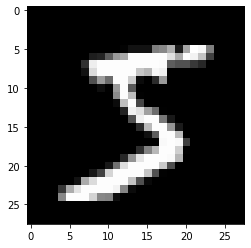

In [3]:
# Plot image data from x_train
plt.imshow(X_train[0], cmap = "gray")

**Question**

What number is represented in the first image?

5



[Back to top](#Index:) 

<a id='part3'></a>

## Single-Layer Autoencoder <a></a>

We start by considering a simple autoencoder with only one hidden layer.

We know that our data comes in 28X28 pixel format. Run the code cell below to verify this.

In [4]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


We start by reshaping our `X` data in a convenient format for our model by flattening our images into a 28X28 = 784 array.

In [25]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [8]:
28*28

784

Following what we did above, print the shape of the reshaped data.

In [6]:
print(X_train.shape)
print(X_test.shape)


(60000, 784)
(10000, 784)


### Defining the Autoencoder

We're now ready to define our autoencoder.

In the code cell below, assign to the variable `input_size` the dimension of the reshaped `X` data. 

Next, we set the size of the bottleneck representation (the output of the encoder), as `latent_size` equal to 10.

In [15]:
input_size = (784)

latent_size = 32

Finally, we are ready to define the various parts that constitute the autoencoder.

Run the code cell below to import the necessary libraries and modules.

In [16]:
from keras.models import Model
from keras.layers import Dense, Input

In the code cell below, we define the input for our model with the appropriate shape.

Next, we need to define how to encode the input. This can be done with the help of the function `Dense` which takes, as argument, the size of the desired output and the type of activation - in this case, ReLu. The second set of brackets here indicates what we want to encode (the input image).

We also define how to decode the output. Again, here we use the function `Dense` with the size of the input and a sigmoid activation function. The second set of brackets here says the we want to decode the encoded image (i.e., that latent representation).

In [17]:
input_img = Input(shape=(input_size,)) # input

latent_rep = Dense(latent_size, activation='relu')(input_img) #encoding definition

output_img = Dense(input_size, activation='sigmoid')(latent_rep) #decoding definition

As the last step, we want to initialize and run our model.

In the code cell below, we define our autoencoder, compile it and fit it to our model.

In the function `compile`, fill in the ellipssis by setting the argument `optimize` equal to `"adam"`.

Finally, set the number of `epochs` equal to 5.

When you are done, run the code cell below to start your model!

In [18]:
autoencoder = Model(input_img, output_img)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')



autoencoder.fit(X_train, X_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1612
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1029
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0960
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0948
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0943


### Visualizing our Results

In this section, we want to see how well our autoencoder did.

In the code cell below, we have defined an auxiliary function to visualize our results. The first part of the function plots the original data from the dataset, and the second one displays the autoencoded images.

Run the code cell below to define our plotting function.

In [19]:
def plot_autoencoder_outputs(autoencoder, n, dims):
    decoded_imgs = autoencoder.predict(X_test)

    # number of example digits to show
    n = 5
    plt.figure(figsize=(10, 4.5))
    for i in range(n):
        # plot original image
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(X_test[i].reshape(*dims))
        plt.gray()
        if i == n/2:
            ax.set_title('Original Images')

        # plot reconstruction 
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(*dims))
        plt.gray()
        if i == n/2:
            ax.set_title('Reconstructed Images')
    plt.show()

Finally, run the code cell below to visualize the results.

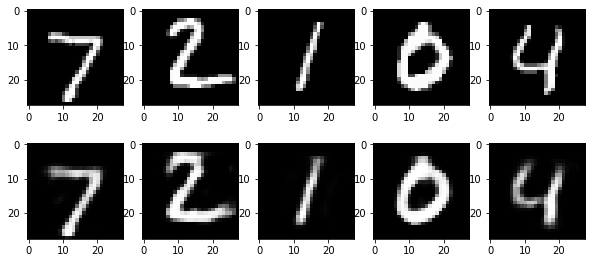

In [20]:
plot_autoencoder_outputs(autoencoder, 5, (28, 28))

The results are not great; for example, the reconstructed "2" looks somewhat like a "3", and the reconstructred "4" looks somewhat like a "9".

**Question**

What do you think would happen to the results if you increased the `latent_size` above, say to 32? Feel free to experiment with the code above.

the results get much better as the latent size gets larger


[Back to top](#Index:) 

<a id='part4'></a>

# Multi-Layer Autoencoder <a></a>
    
In the final part of this activity, we will redefine our encoder to have multiple layers. This is usually what happens in real life.

In the code cell below, we define the input and output size as above. Note that in addition, we also define the size of the hidden layers in each of the multilayer encoder and decoder, as `hidden_size`.

Here we return to the smaller `latent_size`, to see how the more complex encoder and decoder might work, even with the smaller sized bottleneck.

In [29]:
input_size = 784
hidden_size = 128
latent_size = 32

Next, in a similar way as we did above, we use the function `Dense` to define the various layers. Note that we now have multiple (2) hidden layers that use a ReLU function as activation.

In [30]:
input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
latent_rep = Dense(latent_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(latent_rep)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

As a last step, as we did above, we want to define our autoencoder, compile it and fit it to our model.

In the function `compile`, fill in the ellipsis by setting the argument `optimize` equal to `"adam"`.

Finally, set the number of `epochs` equal to 5, the same as with the single layer autoencoder.

When you are done, run the code cell below to start your model!

In [31]:
autoencoder = Model(input_img, output_img)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(X_train, X_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1379
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0989
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0932
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0904
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0887


Finally, we use the same auxiliary plotting function to see how well we did.

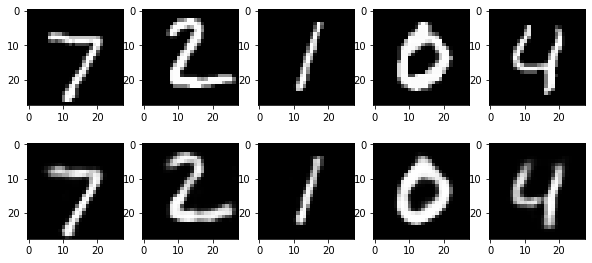

In [32]:
plot_autoencoder_outputs(autoencoder, 5, (28, 28))

**Question**

What difference do you notice compared to the output of the single-layer encoder? Can you justify them?



Better results due to the presence of multiple layers,
when enables a better encoding/decoding to and from the latent representation (even with the latent
representation size being kept the same)